In [10]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_auc_score, f1_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.combine import SMOTETomek, SMOTEENN
from xgboost import XGBClassifier


# Imbalanced dataset

/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/paul/miniconda3/envs/ML/lib/pyt

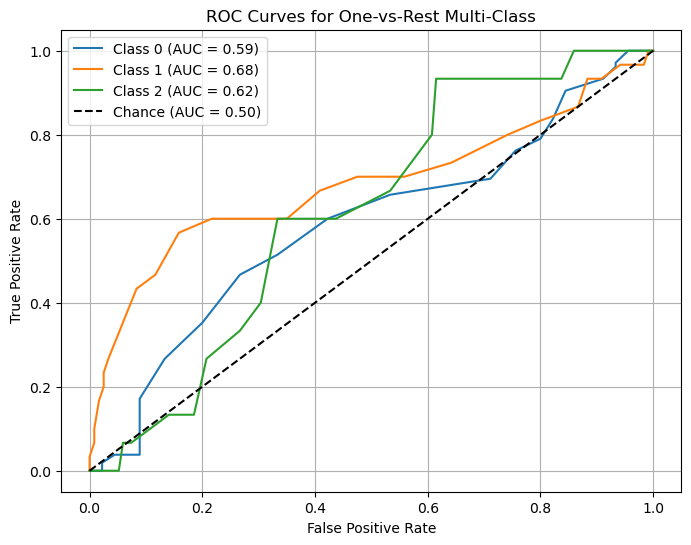

[[39 32 34]
 [ 4 20  6]
 [ 5  3  7]]


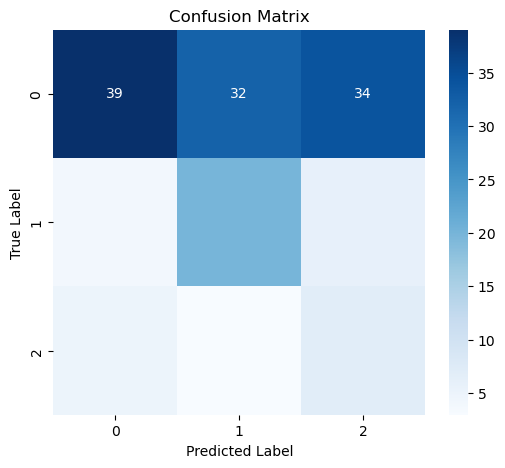

Classification Report:
              precision    recall  f1-score   support

           0      0.812     0.371     0.510       105
           1      0.364     0.667     0.471        30
           2      0.149     0.467     0.226        15

    accuracy                          0.440       150
   macro avg      0.442     0.502     0.402       150
weighted avg      0.656     0.440     0.474       150



In [5]:
# Generate dataset
X, y = make_classification(
    n_samples=150,
    n_features=1000,
    n_informative=20,
    n_redundant=10,
    n_classes=3,
    weights=[0.7, 0.2, 0.1],
    random_state=42
)

# Binarize the labels for One-vs-Rest AUC computation
y_bin = label_binarize(y, classes=[0, 1, 2])

# Initialize Random Forest model
#rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model = make_pipeline(NearMiss(version=2), RandomForestClassifier(n_estimators=100, random_state=1))


# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Get predicted probabilities
y_prob = cross_val_predict(rf_model, X, y, cv=cv, method="predict_proba")
y_pred = cross_val_predict(rf_model, X, y, cv=cv, method="predict")

# Plot AUC-ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(3):  # Loop through each class (0, 1, 2)
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

# Plot random classifier line
plt.plot([0, 1], [0, 1], "k--", label="Chance (AUC = 0.50)")

# Customize plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for One-vs-Rest Multi-Class")
plt.legend()
plt.grid()
plt.show()

# üéØ 3Ô∏è‚É£ Compute & plot confusion matrix
cm = confusion_matrix(y, y_pred)
print(cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# üéØ 4Ô∏è‚É£ Print classification report
print("Classification Report:")
print(classification_report(y, y_pred, digits=3))

Evaluating: No Sampling


/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:39:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:39:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:39:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:39:40] WARNING: /ho

Evaluating: Random OverSampling


/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:40:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:40:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:40:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:40:20] WARNING: /ho

Evaluating: SMOTE


/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:40:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:40:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:41:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:41:14] WARNING: /ho

Evaluating: Random UnderSampling


/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:42:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:42:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:42:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:42:21] WARNING: /ho

Evaluating: NearMiss (v1)


/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:42:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:42:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:42:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:42:30] WARNING: /ho

Evaluating: NearMiss (v2)


/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:42:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:42:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:42:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:42:39] WARNING: /ho

Evaluating: NearMiss (v3)


/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:42:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:42:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:42:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1738880431132/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/paul/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [10:42:50] WARNING: /ho

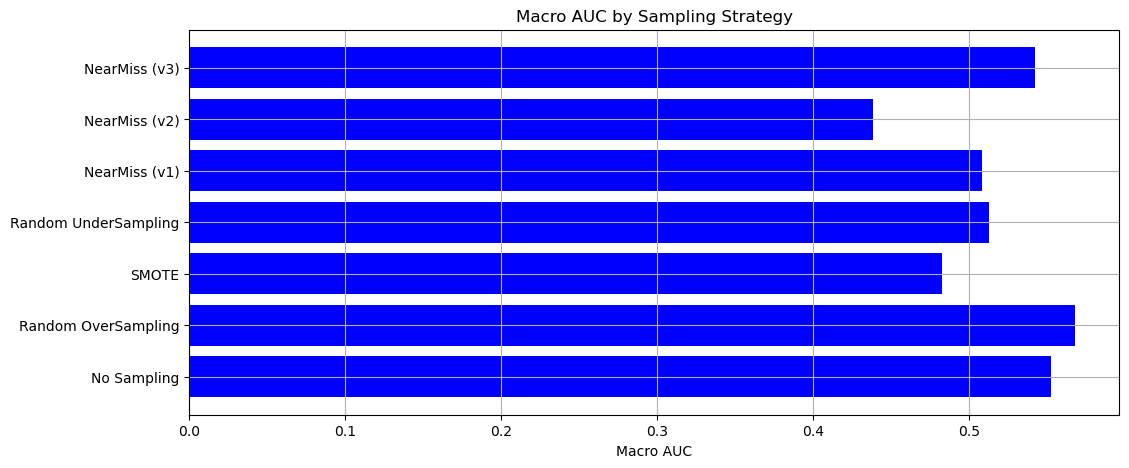

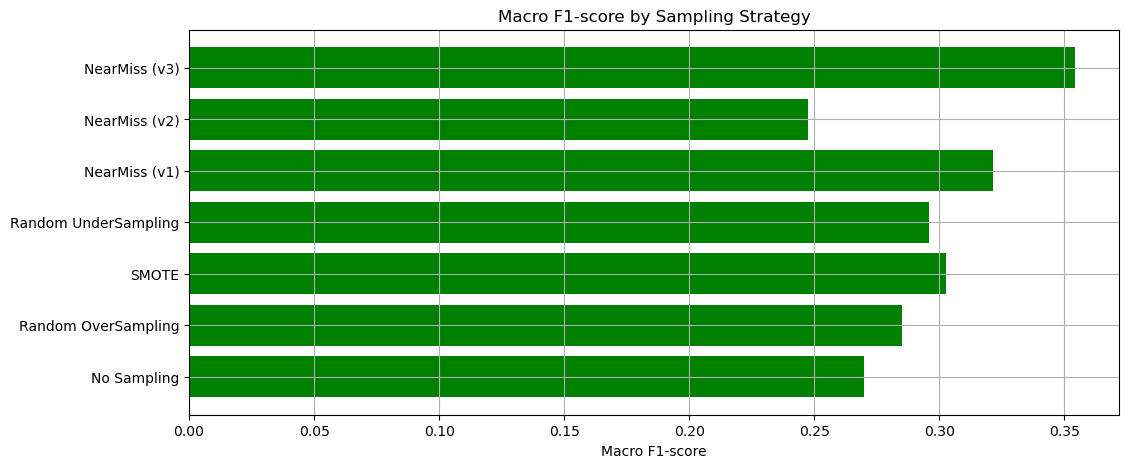

In [11]:

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Generate dataset
X, y = make_classification(
    n_samples=135,
    n_features=1000,
    n_informative=40,
    n_redundant=10,
    n_classes=3,
    weights=[0.66, 0.22, 0.11],
    random_state=42
)

# Binarize labels for AUC computation
y_bin = label_binarize(y, classes=[0, 1, 2])

# Define sampling strategies
sampling_strategies = {
    "No Sampling": None,
    "Random OverSampling": RandomOverSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "Random UnderSampling": RandomUnderSampler(random_state=42),
    "NearMiss (v1)": NearMiss(version=1),
    "NearMiss (v2)": NearMiss(version=2),
    "NearMiss (v3)": NearMiss(version=3),
}


# Store results
macro_results = []
class_results = {cls: [] for cls in range(3)}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for name, sampler in sampling_strategies.items():
    print(f"Evaluating: {name}")
    
    if sampler:
        ml_model = XGBClassifier(
            eval_metric="logloss", random_state=1
        )
        model = make_pipeline(sampler, ml_model)
    else:
        model = XGBClassifier(
            eval_metric="logloss", random_state=1
        )
    
    # Get predictions
    y_prob = cross_val_predict(model, X, y, cv=cv, method="predict_proba")
    y_pred = cross_val_predict(model, X, y, cv=cv, method="predict")
    
    # Compute Macro AUC & F1
    macro_auc = roc_auc_score(y_bin, y_prob, average="macro", multi_class="ovr")
    macro_f1 = f1_score(y, y_pred, average="macro")
    macro_results.append((name, macro_auc, macro_f1))
    
    # Compute One-vs-Rest AUC & F1 for each class
    for cls in range(3):
        ovr_auc = roc_auc_score(y_bin[:, cls], y_prob[:, cls])
        ovr_f1 = f1_score((y == cls).astype(int), (y_pred == cls).astype(int))
        class_results[cls].append((name, ovr_auc, ovr_f1))

# Convert results to arrays for plotting
strategies, macro_aucs, macro_f1s = zip(*macro_results)

def plot_results(title, values, xlabel, color):
    plt.figure(figsize=(12, 5))
    plt.barh(strategies, values, color=color)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.show()

# Plot Macro AUC & F1-score
plot_results("Macro AUC by Sampling Strategy", macro_aucs, "Macro AUC", "blue")
plot_results("Macro F1-score by Sampling Strategy", macro_f1s, "Macro F1-score", "green")

# Plot OvR AUC & F1-score for each class
# colors = ["red", "orange", "purple"]
# for cls in range(3):
#     cls_strategies, ovr_aucs, ovr_f1s = zip(*class_results[cls])
#     plot_results(f"Class {cls} One-vs-Rest AUC", ovr_aucs, "AUC", colors[cls])
#     plot_results(f"Class {cls} One-vs-Rest F1-score", ovr_f1s, "F1-score", colors[cls])




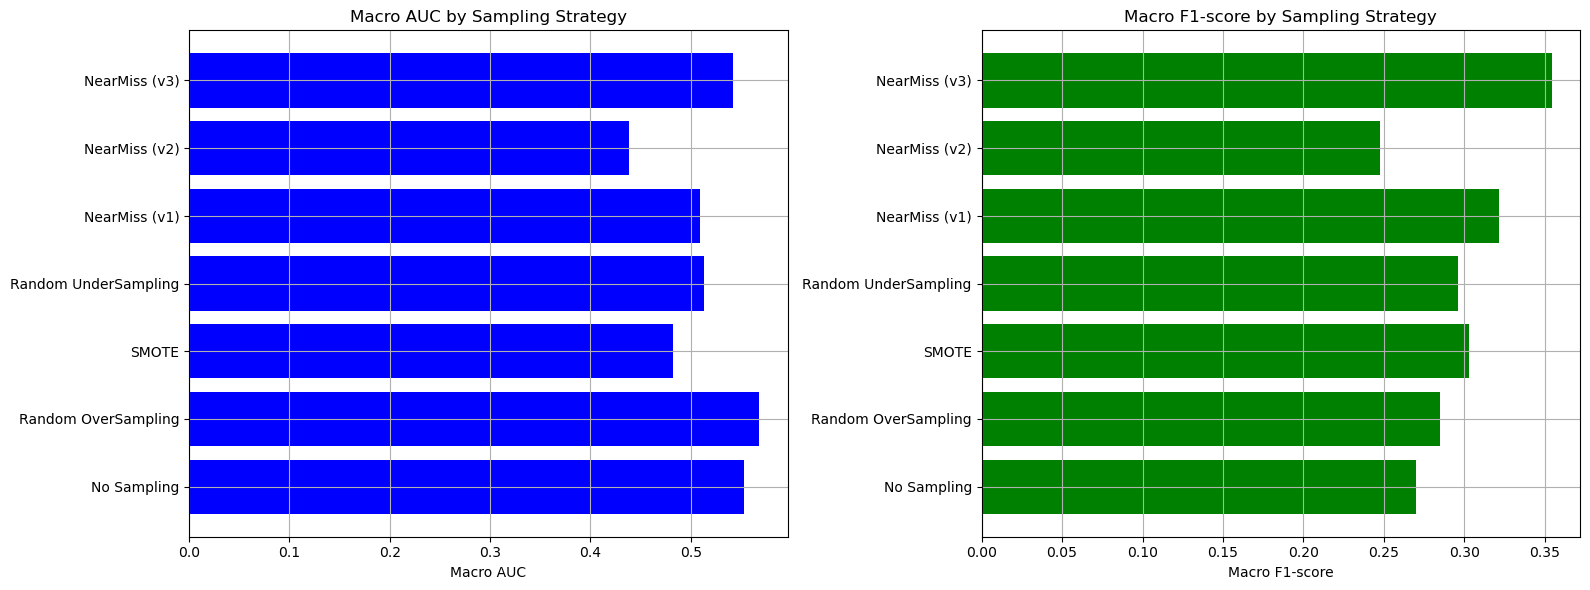

In [13]:
# Plot Macro AUC & Macro F1-score on two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Macro AUC
axes[0].barh(strategies, macro_aucs, color="blue")
axes[0].set_xlabel("Macro AUC")
axes[0].set_title("Macro AUC by Sampling Strategy")
axes[0].grid(True)

# Plot Macro F1-score
axes[1].barh(strategies, macro_f1s, color="green")
axes[1].set_xlabel("Macro F1-score")
axes[1].set_title("Macro F1-score by Sampling Strategy")
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()